# EDA - exploratory data analysis

1. load elements
2. clean data(missing values, duplicates, types)
3. treat outliers
4. univariate, bi variate and multivariate analysis
5. insights 

##### outlier : a data point which differs significantly from other observations in a dataset

how outliers occur?

1. measurement errors
2. data entry mistakes

whr is it important to consider outliers?
1. they can be errors
2. they effect the data analysis

how to identify outliers?

1. statistical method

---> Inter quartile range(IQR)

---> Z - score

2. visualization techniques

---> box plots

---> scatter plots

---> histograms

## univariate, bivariate and multivariate analysis

### univariate analysis - a method that analysis a single variale to describe its characteristics, finding patterns and summarize the data

it involves only one variable

### bivariate analysis - it gives the raletionship between two variables. it helps to find if there is any correlation, any associaton or any connection between the two variables.

it involves two variables

### multivariate analysis - used to understand how multiple factors interact and influencce each other

it involves more than two variables

example : how age, income and education together influence the purchasing behavier 

## etl - extract, transform and load
## elt

## EDA : < Dataset >

1. load and overview

2. cleaning

3. uni, bi and multivariate analysis

4. outlier - IQR

5. feature engineering

6. insights

### feature engineering is the process of turning raw data into useful features that helps to improve the performance of ml models

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
#Basic Information & Overview
print("Shaoe:",df.shape)
print("Info:",df.info())

#Statistical Summary
print("Data Description",df.describe(include='all'))

Shaoe: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Info: None
Data Description           survived      pclass   s

In [38]:
#Basic Information & Overview
print("Shaoe:",df.shape)
print("Info:",df.info())

#Statistical Summary
print("Data Description",df.describe(include='all'))

Shaoe: (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
Info: None
Data Description           survived      pclass   s

In [39]:
# missing value analysis

missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': df.isnull().sum()/len(df) * 100
})
missing.sort_values(by='missing_percent', ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [40]:
# 4. Handling Missing Values
# Fill numeric missing values with mean

df['age']=df['age'].fillna(df['age'].mean())

# Fill categorical missing values with mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# Drop columns with too many missing values
df.drop(columns=['deck'],inplace=True)

# Print missing values after handling

print("Missing values after cleaning :\n",df.isnull().sum())

Missing values after cleaning :
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [41]:
# duplicates
print("duplicated rows:",df.duplicated().sum())
# convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')

df.info()

duplicated rows: 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


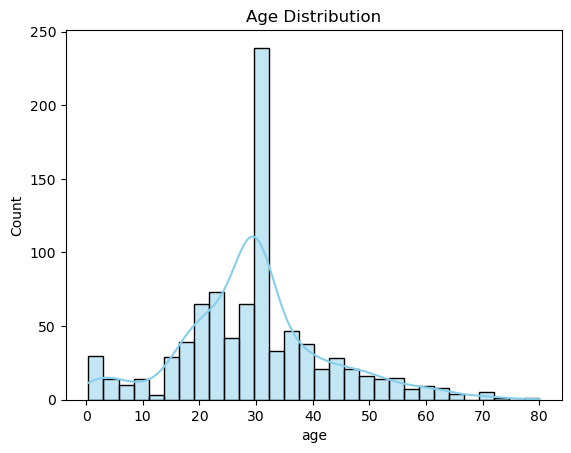

Text(0.5, 1.0, 'Age Boxplot')

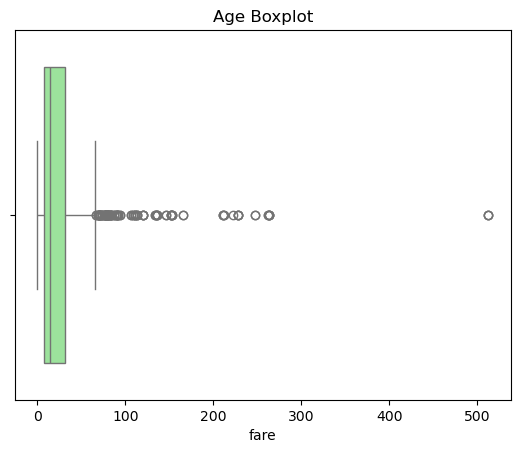

In [42]:
# 6. univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#histogram : age
sns.histplot(df['age'],bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

sns.boxplot(data=df, x='fare', color='lightgreen')
plt.title('Age Boxplot')

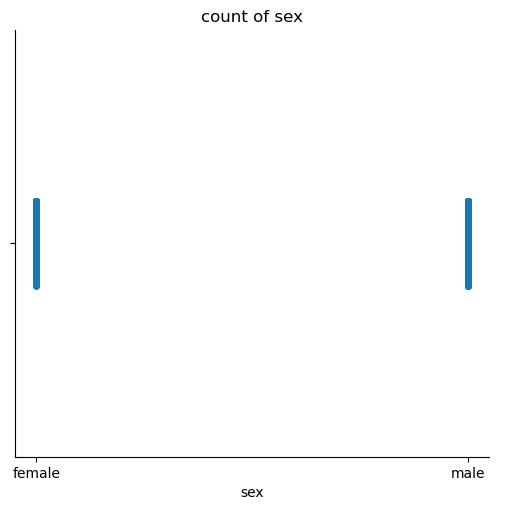

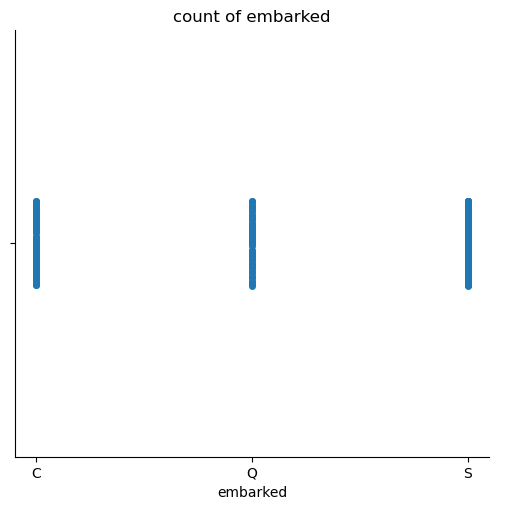

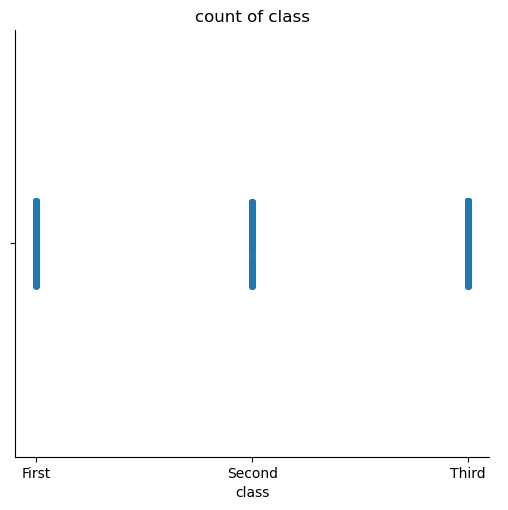

In [43]:
# univariate Analysis - Categorical Features
cat_cols = df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col, data=df)
    plt.title(f'count of {col}')
    plt.show()

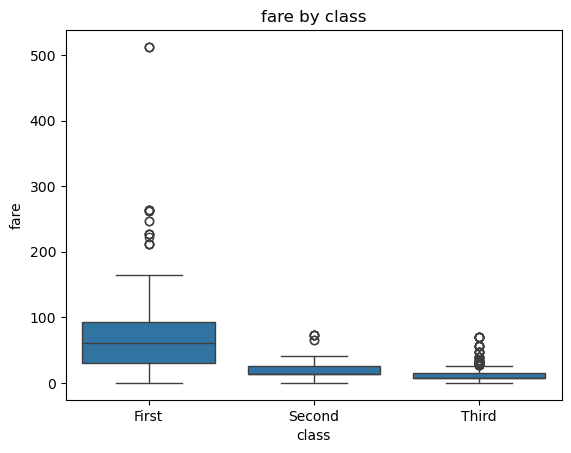

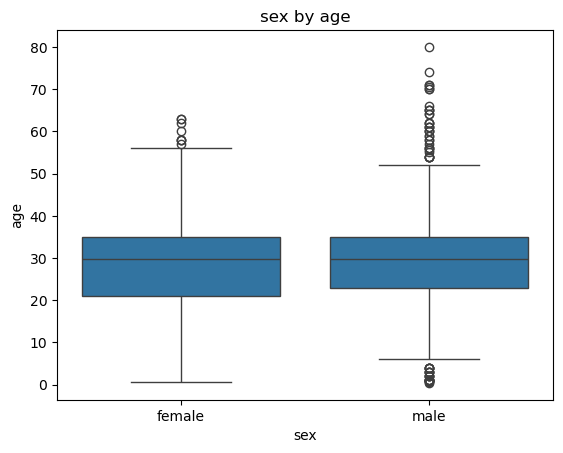

In [44]:
# biviriate analysis - numerical vs categorical
sns.boxplot(data=df, x='class', y='fare')
plt.title('fare by class')
plt.show()

sns.boxplot(data=df, x='sex', y='age')
plt.title('sex by age')
plt.show()

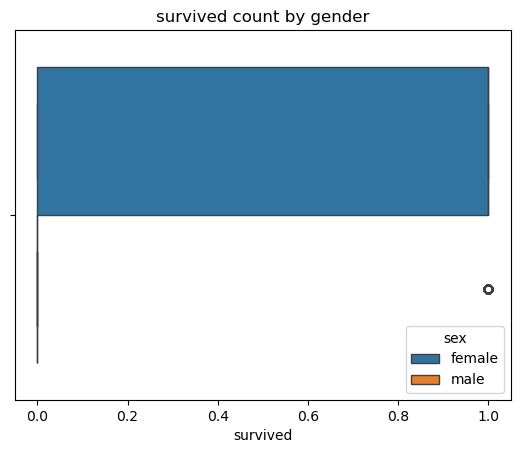

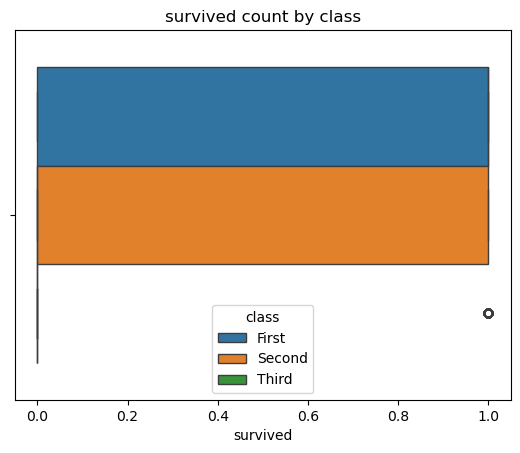

In [45]:
# bivariate analysis - categorical vs categorical
sns.boxplot(x='survived', hue='sex', data=df)
plt.title('survived count by gender')
plt.show()

sns.boxplot(x='survived', hue='class', data=df)
plt.title('survived count by class')
plt.show()

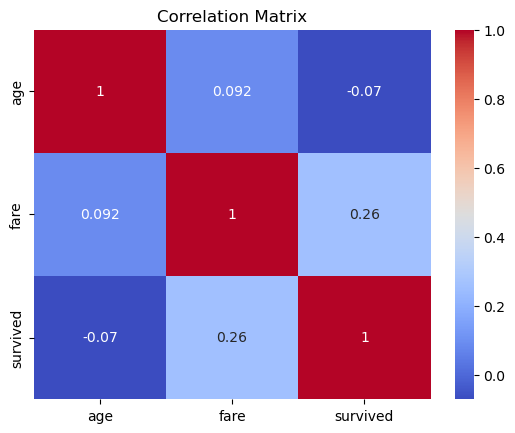

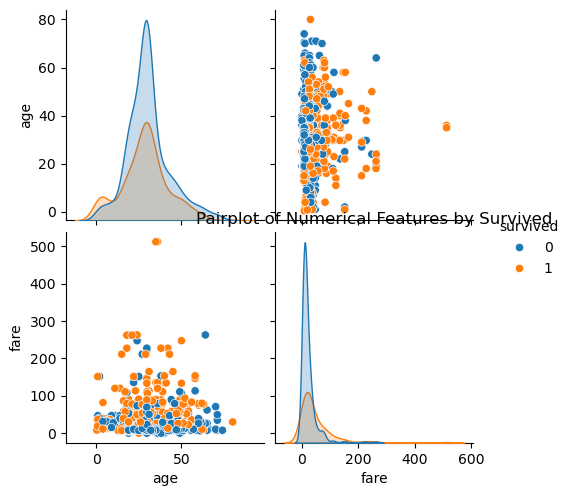

In [46]:

# covariation and multi variate analysis
corr = df[['age', 'fare', 'survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df[['age', 'fare', 'survived',]], hue='survived')
plt.title('Pairplot of Numerical Features by Survived')
plt.show()

### insights

1. fare has a positive correlation with survived

2. age shows a slight negative correlation with survived

Number of outliers in fare: 116


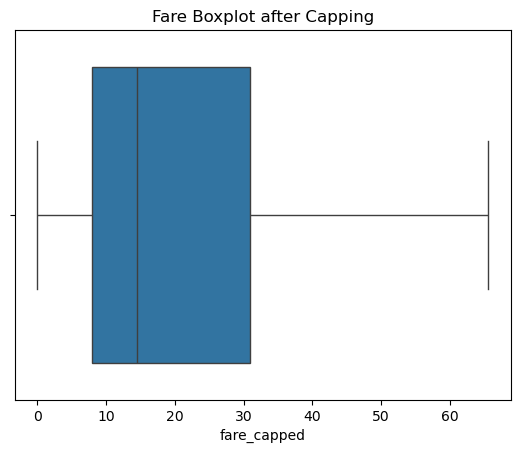

In [52]:
# outlier - iqr
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print("Number of outliers in fare:", len(outliers))

#outliers
df['fare_capped'] = df['fare'].clip(lower_bound, upper_bound)
sns.boxplot(data=df, x='fare_capped')
plt.title('Fare Boxplot after Capping')
plt.show()

891
891


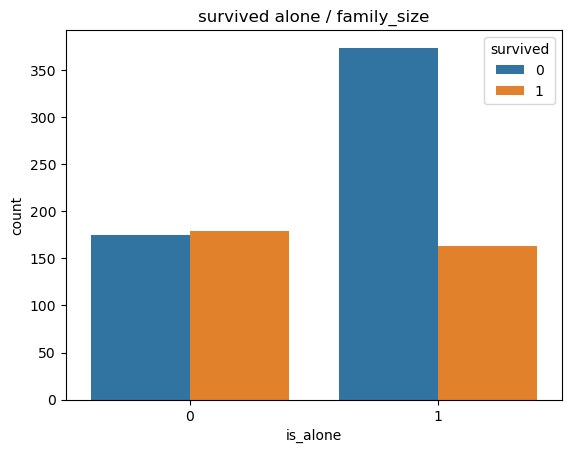

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [62]:
#feature engineering
# Create a new feature (use 'sibsp' instead of non-existent 'shop')
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
print(len(df['family_size']))
print(len(df['is_alone']))

sns.countplot(x='is_alone', hue='survived', data=df)
plt.title("survived alone / family_size")
plt.show()

df[['family_size', 'is_alone', 'survived']].head()

In [63]:
# export the cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned data exported to 'titanic_cleaned.csv'")

Cleaned data exported to 'titanic_cleaned.csv'
